**Loading Libraries**

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read IBM HR Employ Attrition data set**

In [132]:
ibmhr = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")

**Lets See some sample data**

In [133]:
ibmhr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Lets check number of Rows and Column**

In [134]:
ibmhr.shape

(1470, 35)

**Lets check what all different data types we have with our data set**

In [159]:
ibmhr.dtypes

SyntaxError: invalid syntax (<ipython-input-159-85f346a2ef60>, line 1)

**Lets check if anything is null in the dataset**

In [160]:
check_null= ibmhr.isnull()
check_null.sum()

SyntaxError: invalid syntax (<ipython-input-160-61a4f4a61689>, line 2)

**You can find just the columns that have NaN values:**

In [161]:
ibmHTgetNAN=ibmhr.isnull().any()
ibmHTgetNAN

SyntaxError: invalid syntax (<ipython-input-161-dc6e70619998>, line 2)

**Lets check only which are null**

In [138]:
ibmhr_cols=ibmhr[ibmhr.isnull().any(axis=1)]
ibmhr_cols

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Lets check if there are columns which have same values**

In [162]:
ibmhr.nunique()

SyntaxError: invalid syntax (<ipython-input-162-38e81b7ea79d>, line 1)

**Since the value for columns Over18, StandardHours,EmployeeCount same for all rows, we can eliminate these columns.**

In [140]:
cols = ["Over18", "StandardHours", "EmployeeCount"]
for i in cols:
    del ibmhr[i]
    

 **Below are the categorical Variables **

In [141]:
(ibmhr.select_dtypes(exclude=['int64'])).head(0)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime


**Checking the unique values**

In [163]:
for i in range((ibmhr.select_dtypes(exclude=['int64'])).shape[1]):
    print (ibmhr.columns.values[i],":",np.unique(ibmhr[ibmhr.columns.values[i]]),"\n")

SyntaxError: invalid syntax (<ipython-input-163-cfb178dd6290>, line 2)

**Histogram Plots:- A Histogram visualises the distribution of data over a continuous interval or certain time period. Each bar in a histogram represents the tabulated frequency at each interval/bin. The total area of the Histogram is equal to the number of data.Histograms help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. They are also useful for giving a rough view of the probability distribution. Height of the bar represents the frequency per individual interval or bin.
We have illustrated the properties of histograms with these two examples: they are
1.  not smooth
1. depend on end points of bins
1.  depend on width of bins
Lets plot Histogram for various factors in the same plot space using the axes
**

In [164]:
fig, ax = plt.subplots(2,3, figsize=(10,10))             
#plt.suptitle("Distribution of various factors", fontsize=20)
sns.distplot(ibmhr['Age'],kde=False,ax=ax[0,0]) 
sns.distplot(ibmhr['MonthlyIncome'],kde=False,ax=ax[0,1]) 
sns.distplot(ibmhr['DistanceFromHome'],kde=False,ax=ax[0,2])

SyntaxError: invalid syntax (<ipython-input-164-abe463412cff>, line 5)

**KDE Plot:- KDE plots gives more smooth curve than bars.Rather than a histogram, we can get a smooth estimate  of the distribution using a kernel density estimation
The properties of kernel density estimators are, as compared to histograms:
1. smooth
1. no end points
1. depend on bandwidth
Seaborn does with sns.kdeplot and distplot.
Kernel density estimation is a non-parametric method of estimating the probability density function (PDF) of a continuous random variable.  It is non-parametric because it does not assume any underlying distribution for the variable.  Essentially, at every datum, a kernel function is created with the datum at its centre – this ensures that the kernel is symmetric about the datum.
**

In [165]:
fig,ax = plt.subplots(3,3, figsize=(10,10))    
sns.kdeplot(ibmhr['YearsInCurrentRole'], ax = ax[0,0]) 
sns.kdeplot(ibmhr['TotalWorkingYears'], ax = ax[0,1]) 
sns.kdeplot(ibmhr['YearsAtCompany'], ax = ax[0,2])  
sns.kdeplot(ibmhr['DailyRate'], ax = ax[1,0]) 
sns.kdeplot(ibmhr['MonthlyRate'], ax = ax[1,1]) 
sns.kdeplot(ibmhr['NumCompaniesWorked'], ax = ax[1,2])  
sns.distplot(ibmhr['Age'], hist=False,ax = ax[2,0]) 
sns.distplot(ibmhr['MonthlyIncome'],hist=False, ax = ax[2,1]) 
sns.distplot(ibmhr['DistanceFromHome'],hist=False, ax = ax[2,2]) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-165-7475658b6672>, line 11)

**The bandwidth (bw) parameter of the KDE controls how tightly the estimation is 
fit to the data, much like the bin size in a histogram. 
It corresponds to the width of the kernels we plotted above. 
The default behavior tries to guess a good value using a common reference rule,
but it may be helpful to try larger or smaller value**

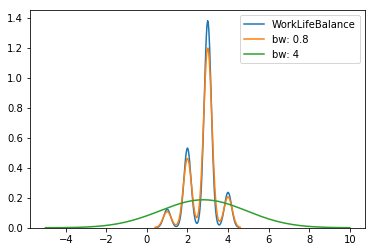

In [145]:
sns.kdeplot(ibmhr['WorkLifeBalance'])
sns.kdeplot(ibmhr['WorkLifeBalance'], bw=.2, label="bw: 0.8")
sns.kdeplot(ibmhr['WorkLifeBalance'], bw=2, label="bw: 4")
plt.legend();

**Count Plot:- A count plot can be thought of as a histogram across a categorical**

In [166]:
fig,ax = plt.subplots(3,2, figsize=(20,20))  
plt.suptitle("Count Plots for various factors", fontsize=20)
sns.countplot(ibmhr['Attrition'], ax = ax[0,0]) 
sns.countplot(ibmhr['BusinessTravel'], ax = ax[0,1]) 
sns.countplot(ibmhr['Department'], ax = ax[1,0]) 
sns.countplot(ibmhr['EducationField'], ax = ax[1,1])
sns.countplot(ibmhr['Gender'], ax = ax[2,0])  
sns.countplot(ibmhr['OverTime'], ax = ax[2,1]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show() 

SyntaxError: invalid syntax (<ipython-input-166-78aedb94d255>, line 11)

**Plotting bivariate distributions:-
In case we need to find out relation between 2 variables of dataset.We need to plot bivariate plots
So for only two random variables, this is called a bivariate distribution, but the concept generalizes to any number of random variables, giving a multivariate distribution.
 **

In [167]:
sns.jointplot(x='MonthlyIncome', y='YearsAtCompany', data=ibmhr,kind = 'hex');
sns.jointplot(ibmhr.MonthlyIncome, ibmhr.YearsAtCompany, ibmhr, kind = 'kde');
plt.show()

SyntaxError: invalid syntax (<ipython-input-167-1b7bb5e56603>, line 3)

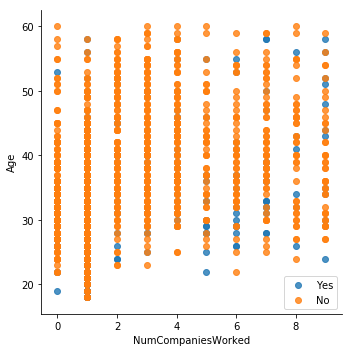

In [148]:
sns.lmplot( x="NumCompaniesWorked", y="Age", data=ibmhr, fit_reg=False, hue='Attrition', legend=False)
plt.legend(loc='lower right')

1. **Pair Plots The pair plot shows bivariate histograms by default in diagonal axes.In pair plot we can plot n number of variables together.**

In [169]:
sns.pairplot(ibmhr.iloc[:,[1,29,30,31]], hue='Attrition', size=3.5);

SyntaxError: invalid syntax (<ipython-input-169-9b62a314591c>, line 1)

**Stripplot for categorical variables SInce the scatterplot points are overlapped,
its difficult to see the full distribution of data. 
1. One easy solution is to adjust the positions (only along the categorical axis) using some random “jitter”(ax[0,1]) 
1. A different approach is to use the function swarmplot(),  which positions each scatterplot point on the   categorical axis with an algorithm that avoids overlapping points and we can add a nested categorical variable with the hue parameter. 
Fig. ax[1,0] and ax[1,1]
**

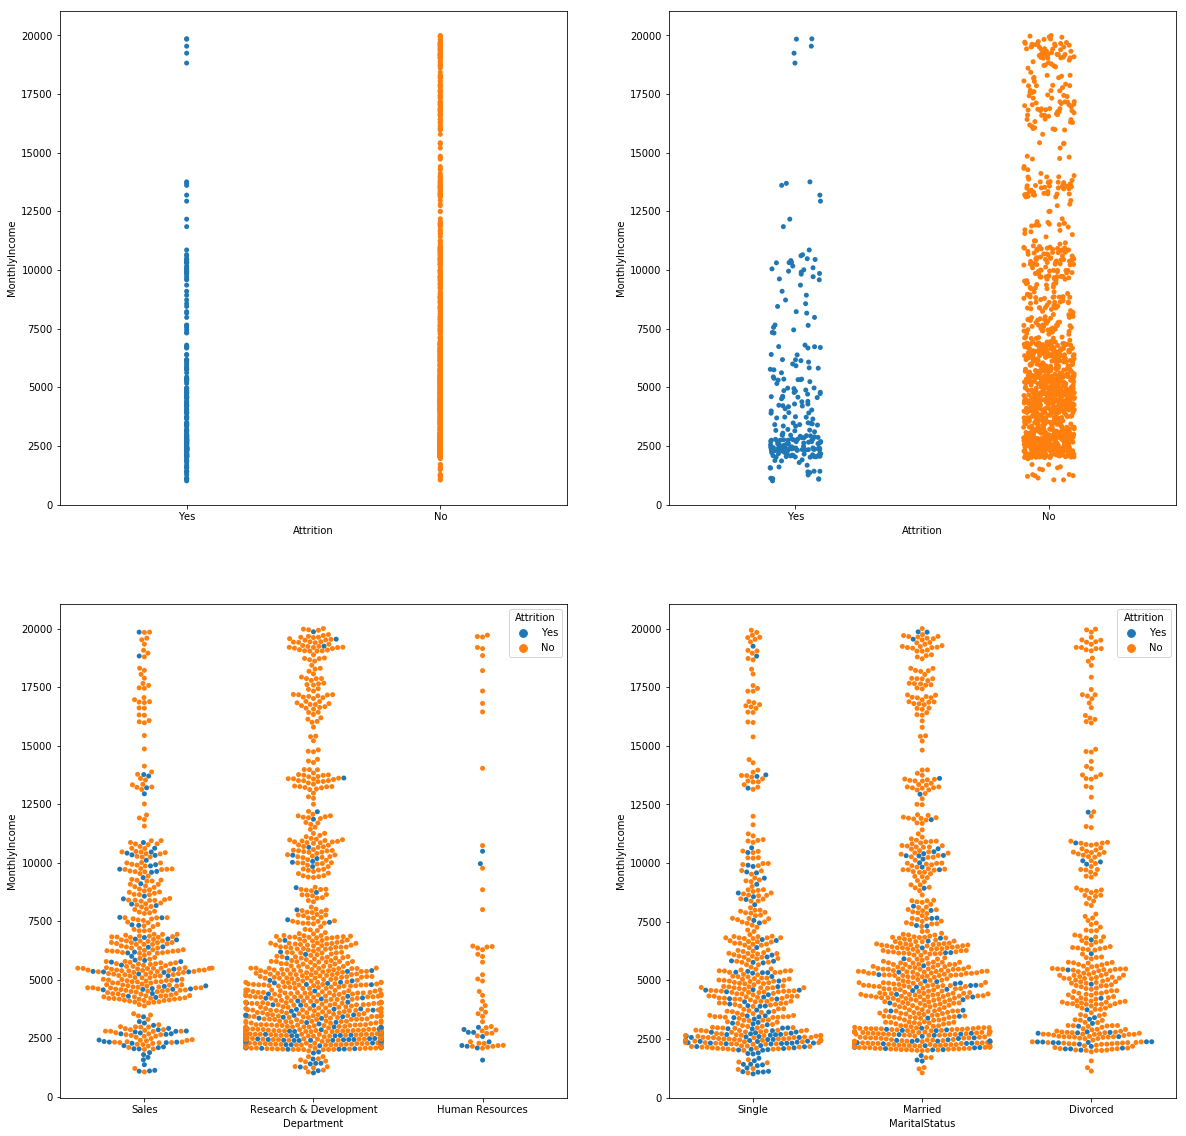

In [150]:
fig,ax = plt.subplots(2,2, figsize=(20,20))
sns.stripplot(x="Attrition", y="MonthlyIncome", data=ibmhr,ax= ax[0,0]);
sns.stripplot(x="Attrition", y="MonthlyIncome", data=ibmhr, jitter=True, ax=ax[0,1]);
sns.swarmplot(x="Department", y="MonthlyIncome",hue="Attrition" ,data=ibmhr, ax=ax[1,0]);
sns.swarmplot(x="MaritalStatus", y="MonthlyIncome",hue="Attrition" ,data=ibmhr, ax=ax[1,1]);


**Boxplots:- Box plot shows the three quartile values of the distribution along with extreme values. 
The “whiskers” extend to points that lie within 1.5
IQRs of the lower and upper quartile, and then observations that fall
outside this range are displayed independently.
Importantly, this means that each value in the boxplot corresponds to 
an actual observation in the data:
**

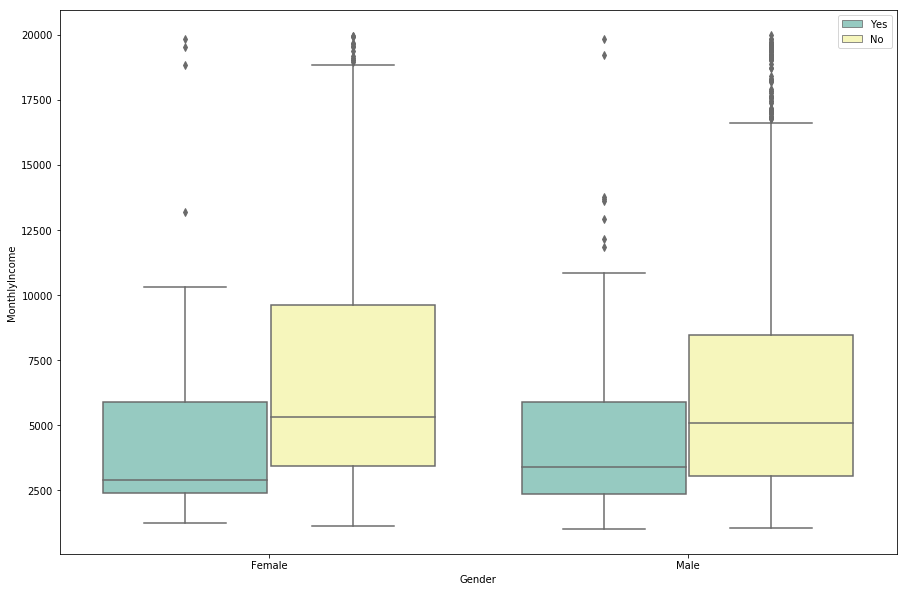

In [151]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = 'Gender',y = 'MonthlyIncome',data=ibmhr, hue='Attrition',palette='Set3')
plt.legend(loc='best')
plt.show()

**Violinplots:-A different approach is a violinplot(),
which combines a boxplot with the kernel density estimation procedure.
This approach uses the kernel 
density estimate to provide a better description of the distribution of values. 
Additionally, the quartile and whikser values from the boxplot are shown inside the violin.
**

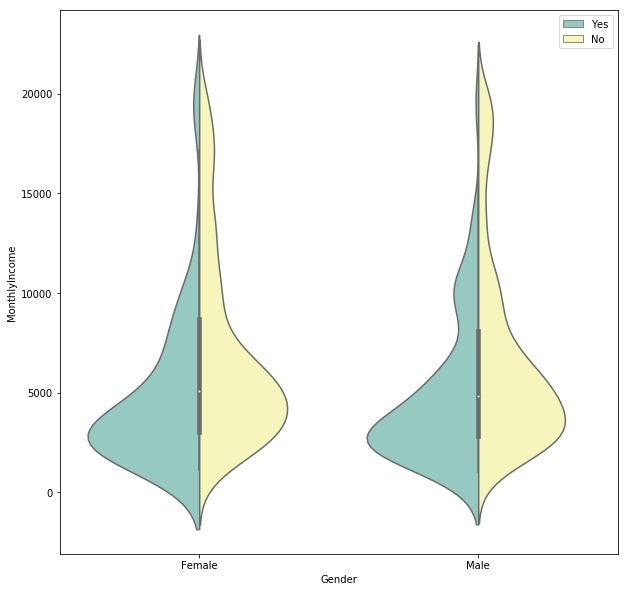

In [152]:
fig,ax = plt.subplots(figsize=(10,10))
sns.violinplot(x = 'Gender',y = 'MonthlyIncome',data=ibmhr, hue='Attrition',split=True,palette='Set3')
plt.legend(loc='best')
plt.show()


**Bar plots**

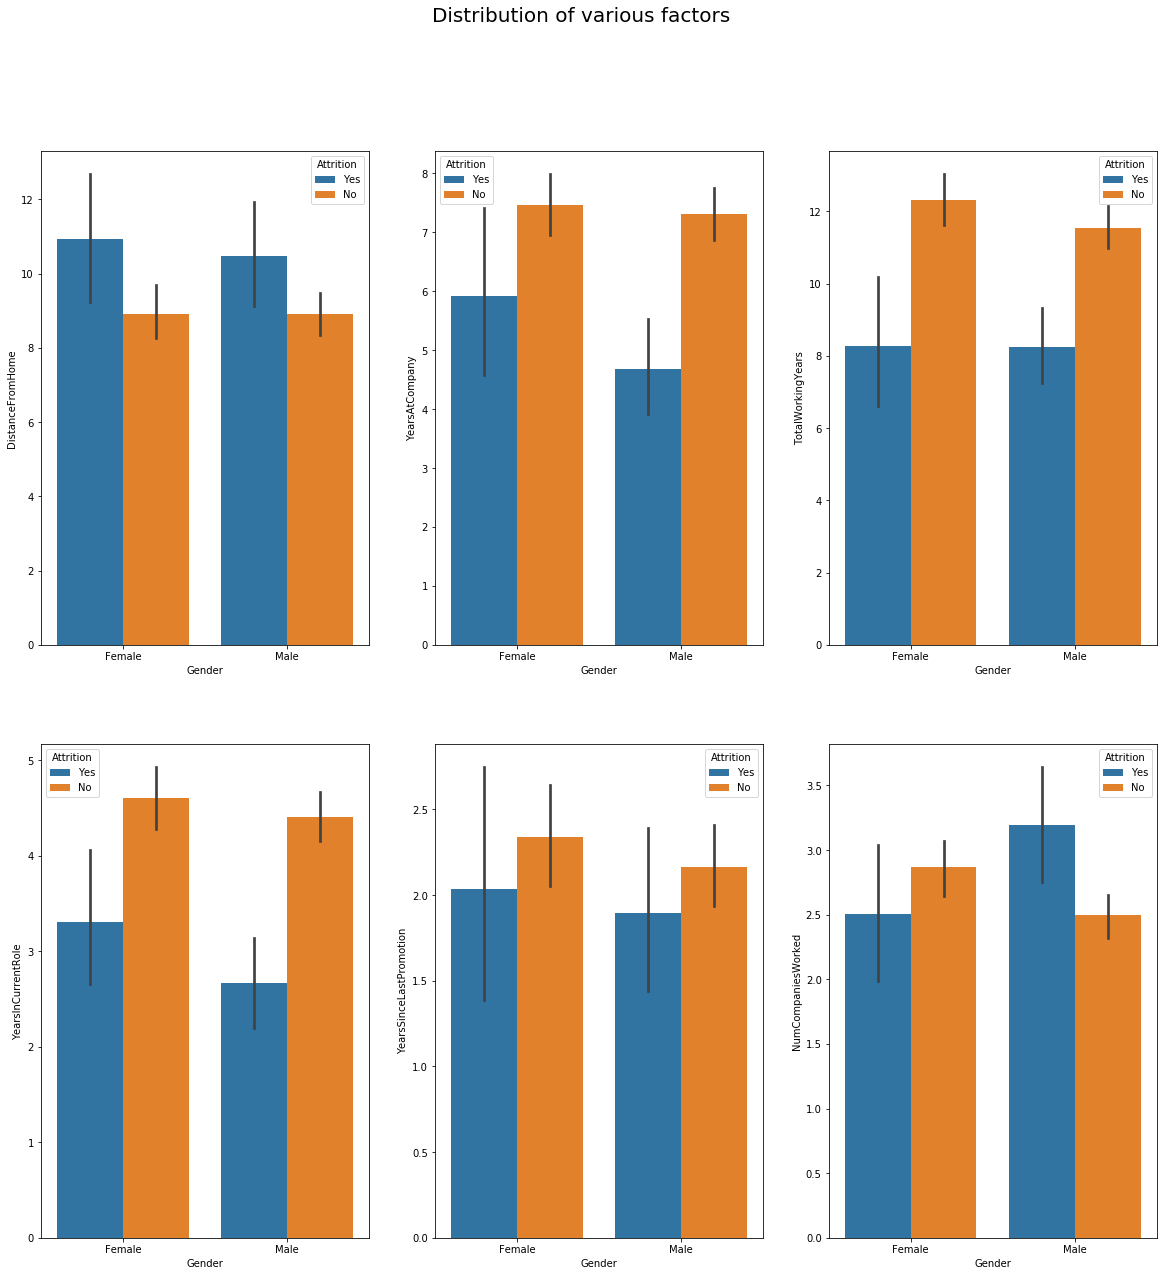

In [153]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.barplot(ibmhr['Gender'],ibmhr['DistanceFromHome'],hue = ibmhr['Attrition'], ax = ax[0,0]); 
sns.barplot(ibmhr['Gender'],ibmhr['YearsAtCompany'],hue = ibmhr['Attrition'], ax = ax[0,1]); 
sns.barplot(ibmhr['Gender'],ibmhr['TotalWorkingYears'],hue = ibmhr['Attrition'], ax = ax[0,2]); 
sns.barplot(ibmhr['Gender'],ibmhr['YearsInCurrentRole'],hue = ibmhr['Attrition'], ax = ax[1,0]); 
sns.barplot(ibmhr['Gender'],ibmhr['YearsSinceLastPromotion'],hue = ibmhr['Attrition'], ax = ax[1,1]); 
sns.barplot(ibmhr['Gender'],ibmhr['NumCompaniesWorked'],hue = ibmhr['Attrition'], ax = ax[1,2]); 
plt.show()

**Conclusion from above fig Distance from home matters to women employees more than men.
Female employes are spending more years in one company compare to their counterpart.
Female employes spending more years in current company are more inclined to switch.
Factor Plot and Facet Grid**

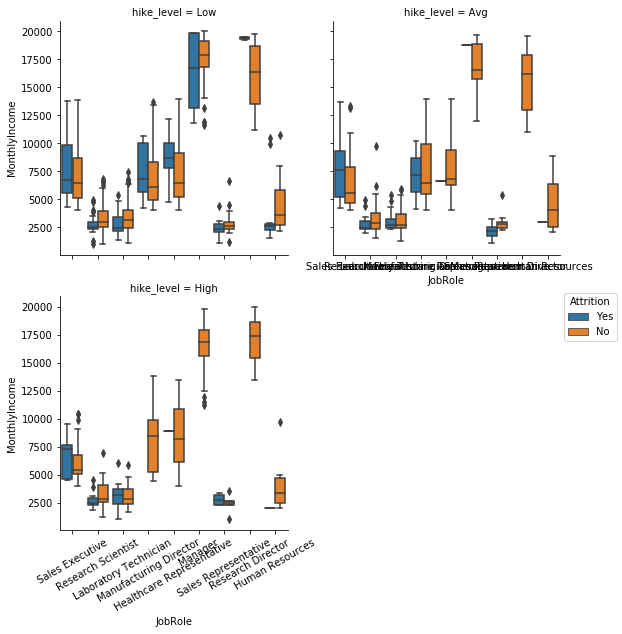

In [154]:
ibmhr['hike_level'] = pd.cut(ibmhr['PercentSalaryHike'], 3, labels=['Low', 'Avg', 'High']) 
sns.factorplot(x ='JobRole',y ='MonthlyIncome',hue = 'Attrition',col = 'hike_level',col_wrap=2,
               kind = 'box',
               data = ibmhr)
plt.xticks( rotation=30)
plt.show()


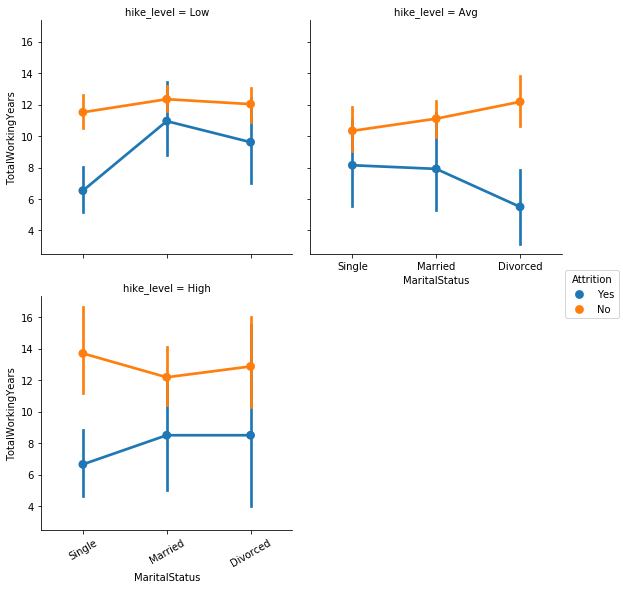

In [155]:
sns.factorplot(x ='MaritalStatus',y ='TotalWorkingYears',hue = 'Attrition',col = 'hike_level',col_wrap=2,
               data = ibmhr)
plt.xticks( rotation=30)
plt.show()

**Correlation Plot-More the correlation betwen variable the higher the correlation value is.The salary hike affects married more when the monthly income is around 6k. 
But when the hike level is avg single are tending more towards switching.When hike level is high everyone seems to be happy and less attrition.**

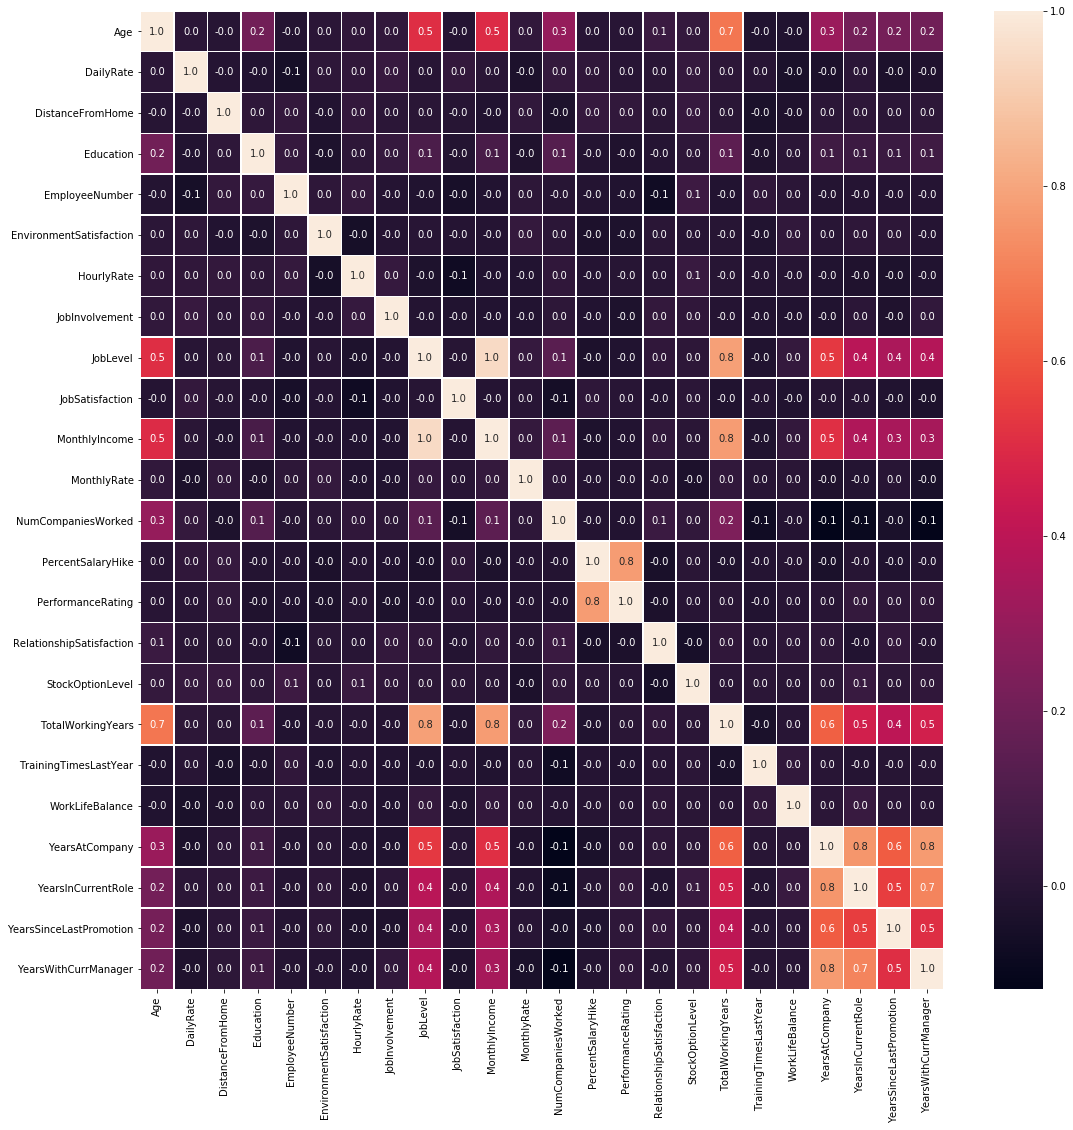

In [156]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(ibmhr.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
